# Downloading Stream and Rain Gages

Info on how to use pyQ can be found at https://code.kx.com/v2/interfaces/pyq/user-guide/. And extra info on how to run queries can be found at https://code.kx.com/q4m3/9_Queries_q-sql/.

In [1]:
gp:.p.import[`geopandas]

gages:("SSSSFFSSIFFFFFFFFSSISSSSFF";enlist ",") 0:`:data/usgs_gage_subset.csv
gages[`site_no]:`${$[7=count x;"0",x;x]}each string each gages[`site_no]


\l ../fdl2019/ml/ml.q 
\l ../fdl2019/ml/init.q
/\l gagesdir/gagesdir

Get the max gage height per stream gage per day

In [ ]:
show max_ht_str:0!select max height by site_no,date from str
max_ht_str[`site_no]:`${$[7=count x;"0",x;x]}each max_ht_str[`site_no]

In [2]:
max_ht_str:("SDF";enlist ",") 0:`:../maxht.csv
max_ht_str:select from max_ht_str where height>=0

Save down as a csv

In [ ]:
/save `:max_ht_str

In [ ]:
/\cd ../../

Upload the precipitation data from the prism folder

In [3]:
show precipall:raze {flip `site_no`long`lat`elv`date`ppt!flip value each 10_("SFFFDF";enlist ",")0: 
    hsym `$"data/prism/",string[x]} each key `:data/prism

precipall:`date xasc delete from precipall where site_no=`
precipall[`site_no]:`${$[7=count x;"0",x;x]}each string each precipall[`site_no]


site_no long     lat     elv  date       ppt 
---------------------------------------------
1367690 -74.5596 41.1053 1056 2019.01.01 0.94
1367690 -74.5596 41.1053 1056 2019.01.02 0   
1367690 -74.5596 41.1053 1056 2019.01.03 0   
1367690 -74.5596 41.1053 1056 2019.01.04 0   
1367690 -74.5596 41.1053 1056 2019.01.05 0.38
1367690 -74.5596 41.1053 1056 2019.01.06 0.79
1367690 -74.5596 41.1053 1056 2019.01.07 0   
1367690 -74.5596 41.1053 1056 2019.01.08 0.02
1367690 -74.5596 41.1053 1056 2019.01.09 0.15
1367690 -74.5596 41.1053 1056 2019.01.10 0   
1367690 -74.5596 41.1053 1056 2019.01.11 0   
1367690 -74.5596 41.1053 1056 2019.01.12 0   
1367690 -74.5596 41.1053 1056 2019.01.13 0   
1367690 -74.5596 41.1053 1056 2019.01.14 0   
1367690 -74.5596 41.1053 1056 2019.01.15 0   
1367690 -74.5596 41.1053 1056 2019.01.16 0   
1367690 -74.5596 41.1053 1056 2019.01.17 0   
1367690 -74.5596 41.1053 1056 2019.01.18 0.06
1367690 -74.5596 41.1053 1056 2019.01.19 0   
1367690 -74.5596 41.1053 1056 2019

In [4]:
/save `:precipall.csv
/system"gsutil cp precipall.csv gs://nasa_fdl_floods_2019/data/rain_data/precipall.csv"

`:precipall.csv


In [4]:
max_ht_str_prev:update prev_h_1:prev height,prev_h_2:2 xprev height,prev_h_3:3 xprev height,
 prev_h_4:4 xprev height,prev_h_5:5 xprev height,prev_h_6:6 xprev height,
 prev_h_7:7 xprev height,prev_h_8:8 xprev height,prev_h_9: 9 xprev height,
 prev_h_10:10 xprev height,prev_h_11:11 xprev height,prev_h_12:12 xprev height,
 prev_h_13:13 xprev height,prev_h_14:14 xprev height,
 prev_h_15:15 xprev height,avgppt:30 mavg height by site_no from max_ht_str

In [5]:
show max_ht_str_prev_month:select from max_ht_str_prev where 1=`dd$date

site_no  date       height prev_h_1 prev_h_2 prev_h_3 prev_h_4 prev_h_5 prev_..
-----------------------------------------------------------------------------..
01200000 2009.07.01 2.76                                                     ..
01200000 2009.08.01 4.03   3.8      2.94     2.75     3.22     3.42     3.09 ..
01200000 2009.09.01 1.66   1.82     2.2      2.26     1.56     1.6      1.64 ..
01200000 2009.10.01 1.2    1.29     1.52     1.5      1.23     1.01     1.04 ..
01200000 2009.11.01 2      2.04     2.33     2.67     2.51     1.86     2.22 ..
01200000 2009.12.01 1.78   1.71     1.72     1.73     1.76     1.79     1.81 ..
01200000 2010.02.01 2.7    2.8      2.99     3.3      3.73     4.54     5.3  ..
01200000 2010.03.01 3.76   4.35     5.73     5.98     5.27     2.51     1.88 ..
01200000 2010.04.01 5.58   6.17     5.67     4.51     3.32     3.64     3.69 ..
01200000 2010.05.01 1.86   1.96     2.09     2.29     2.37     2.13     2.01 ..
01200000 2010.06.01 1.24   1.22     1.24

Some site_no's have the last few digits excluded from the prism dataset (problem with the prism download side)

In [6]:
rms:asc ds where 12<count each string each ds:exec distinct site_no from gages 
names:0!select i by site_no from precipall where site_no in `$12#'string each rms

{![`precipall;enlist (in;`i;y);0b;(enlist `site_no)!enlist enlist x]}'[rms[til[20],22 23 24 25];
    names[`x][til[20],21 22 23 24]]

matchnames:0!select i by lat,long from precipall where i in names[`x][20]

{![`precipall;enlist (in;`i;y);0b;(enlist `site_no)!enlist enlist x]}'[rms[21 20];matchnames[`x]]


`precipall`precipall`precipall`precipall`precipall`precipall`precipall`precip..


`precipall`precipall


In [7]:
show precipall_prev:update prev1:prev ppt,prev2:2 xprev ppt,prev3:3 xprev ppt,
 prev4:4 xprev ppt,prev5:5 xprev ppt,prev6:6 xprev ppt,
 prev7:7 xprev ppt,prev8:8 xprev ppt,prev9: 9 xprev ppt,
 prev10:10 xprev ppt,prev11:11 xprev ppt,prev12:12 xprev ppt,prev13:13 xprev ppt,prev14:14 xprev ppt,
 prev15:15 xprev ppt,avgppt:30 mavg ppt by site_no from precipall

site_no  long     lat     elv  date       ppt  prev1 prev2 prev3 prev4 prev5 ..
-----------------------------------------------------------------------------..
01367690 -74.5596 41.1053 1056 2009.07.01 0.46                               ..
01367715 -74.5786 41.1333 617  2009.07.01 0.62                               ..
01367800 -74.6753 41.1628 512  2009.07.01 0.54                               ..
01367805 -74.6566 41.17   512  2009.07.01 0.54                               ..
01377000 -73.9892 40.9992 52   2009.07.01 0.47                               ..
01377370 -74.0392 41.0367 240  2009.07.01 0.43                               ..
01377451 -74.0481 41.0119 85   2009.07.01 0.5                                ..
01377500 -74.0211 40.9928 85   2009.07.01 0.5                                ..
01378500 -74.0267 40.9483 79   2009.07.01 0.68                               ..
01379000 -74.5289 40.68   266  2009.07.01 0.16                               ..
01379500 -74.3897 40.7261 341  2009.07.0

In [8]:
show rain_prev_month:select from precipall_prev where 1=`dd$date

site_no  long     lat     elv  date       ppt  prev1 prev2 prev3 prev4 prev5 ..
-----------------------------------------------------------------------------..
01367690 -74.5596 41.1053 1056 2009.07.01 0.46                               ..
01367715 -74.5786 41.1333 617  2009.07.01 0.62                               ..
01367800 -74.6753 41.1628 512  2009.07.01 0.54                               ..
01367805 -74.6566 41.17   512  2009.07.01 0.54                               ..
01377000 -73.9892 40.9992 52   2009.07.01 0.47                               ..
01377370 -74.0392 41.0367 240  2009.07.01 0.43                               ..
01377451 -74.0481 41.0119 85   2009.07.01 0.5                                ..
01377500 -74.0211 40.9928 85   2009.07.01 0.5                                ..
01378500 -74.0267 40.9483 79   2009.07.01 0.68                               ..
01379000 -74.5289 40.68   266  2009.07.01 0.16                               ..
01379500 -74.3897 40.7261 341  2009.07.0

In [9]:
show all_prev:rain_prev_month ij `site_no`date xkey max_ht_str_prev_month

site_no  long     lat     elv  date       ppt  prev1 prev2 prev3 prev4 prev5 ..
-----------------------------------------------------------------------------..
01367800 -74.6753 41.1628 512  2009.07.01 0.54                               ..
01377000 -73.9892 40.9992 52   2009.07.01 0.47                               ..
01377370 -74.0392 41.0367 240  2009.07.01 0.43                               ..
01377500 -74.0211 40.9928 85   2009.07.01 0.5                                ..
01378500 -74.0267 40.9483 79   2009.07.01 0.68                               ..
01379000 -74.5289 40.68   266  2009.07.01 0.16                               ..
01379500 -74.3897 40.7261 341  2009.07.01 0.2                                ..
01379773 -74.5397 40.96   925  2009.07.01 0.14                               ..
01379780 -74.5572 40.9494 925  2009.07.01 0.14                               ..
01379868 -74.5333 40.8731 650  2009.07.01 0.15                               ..
01380500 -74.4097 40.9028 587  2009.07.0

In [10]:
show windowed:select window_2:max 2 mavg ppt,window_3:max 3 mavg ppt,window_4:max 4 mavg ppt,window_5:max 5 mavg 
    ppt,window_6:max 6 mavg ppt,window_7:max 7 mavg ppt,window_8:max 8 mavg ppt,window_9:max 9 mavg ppt,
    window_10:max 10 mavg ppt,window_11:max 11 mavg ppt,window_12:max 12 mavg ppt,window_13:max 13 mavg ppt,
    window_14:max 14 mavg ppt,window_15:max 15 mavg ppt,window_16:max 16 mavg ppt,window_17:max 17 mavg ppt,
    window_18:max 18 mavg ppt,window_19:max 19 mavg ppt,window_20:max 20 mavg ppt,window_21:max 21 mavg ppt,
    window_22:max 22 mavg ppt,window_23:max 23 mavg ppt,window_24:max 24 mavg ppt,window_25:max 25 mavg ppt,
    window_26:max 26 mavg ppt,window_27:max 27 mavg ppt,window_28:max 28 mavg ppt,window_29:max 29 mavg ppt,
    window_30:max 30 mavg ppt,window_31:max 31 mavg ppt,avgppt:avg ppt by "m"$date,site_no from precipall

date    site_no | window_2 window_3  window_4 window_5 window_6  window_7  wi..
----------------| -----------------------------------------------------------..
2009.07 01200000| 1.19     0.8066667 0.605    0.734    0.6683333 0.5728571 0...
2009.07 01302020| 0.555    0.43      0.485    0.43     0.41      0.41      0...
2009.07 01303000| 0.635    0.4233333 0.3175   0.32     0.2716667 0.2714286 0...
2009.07 01303500| 0.615    0.54      0.4225   0.344    0.3166667 0.2814286 0...
2009.07 01304000| 1.105    1.146667  0.8775   0.716    0.615     0.5342857 0...
2009.07 01304500| 1.155    0.9733333 0.875    0.744    0.6516667 0.5585714 0...
2009.07 01305000| 1.41     1.35      1.055    0.868    0.74      0.6414286 0...
2009.07 01305500| 1.065    1.063333  0.8175   0.676    0.5733333 0.4985714 0...
2009.07 01306460| 1.13     1.113333  0.8525   0.696    0.595     0.5171429 0...
2009.07 01308000| 0.7      0.8233333 0.625    0.514    0.435     0.3771429 0...
2009.07 01308500| 0.7      0.8233333 0.6

In [11]:
show window_prev:(update date:"m"$date from all_prev) ij windowed

site_no  long     lat     elv  date    ppt  prev1 prev2 prev3 prev4 prev5 pre..
-----------------------------------------------------------------------------..
01367800 -74.6753 41.1628 512  2009.07 0.54                                  ..
01377000 -73.9892 40.9992 52   2009.07 0.47                                  ..
01377370 -74.0392 41.0367 240  2009.07 0.43                                  ..
01377500 -74.0211 40.9928 85   2009.07 0.5                                   ..
01378500 -74.0267 40.9483 79   2009.07 0.68                                  ..
01379000 -74.5289 40.68   266  2009.07 0.16                                  ..
01379500 -74.3897 40.7261 341  2009.07 0.2                                   ..
01379773 -74.5397 40.96   925  2009.07 0.14                                  ..
01379780 -74.5572 40.9494 925  2009.07 0.14                                  ..
01379868 -74.5333 40.8731 650  2009.07 0.15                                  ..
01380500 -74.4097 40.9028 587  2009.07 0

In [12]:
window_prev:delete ppt,height from window_prev

In [13]:
prev_win:select site_no,date:date+1,window_2_prev:window_2,window_3_prev:window_3,window_4_prev:window_4,
    window_5_prev:window_5,window_6_prev:window_6,window_7_prev:window_7,window_8_prev:window_8,
    window_9_prev:window_9,window_10_prev:window_10,window_11_prev:window_11,window_12_prev:window_12,
    window_13_prev:window_13,window_14_prev:window_14,window_15_prev:window_15,window_16_prev:window_16,
    window_17_prev:window_17,window_18_prev:window_18,window_19_prev:window_19,window_20_prev:window_20,
    window_21_prev:window_21,window_22_prev:window_22,window_23_prev:window_23,window_24_prev:window_24,
    window_25_prev:window_25,window_26_prev:window_26,window_27_prev:window_27,window_28_prev:window_28,
    window_29_prev:window_29,window_30_prev:window_30,window_31_prev:window_31,avg_prev:avgppt from (0!windowed)

In [14]:
window_prev:window_prev ij `date`site_no xkey prev_win

In [15]:
/save `window_prev.csv
/system "gsutil cp window_prev.csv gs://nasa_fdl_floods_2019/ml_data/window_prev.csv"

Get the flood warning levels to match with the stream gages

In [16]:
warnings:gp[`:read_file]["data/national_shapefile_obs.shp"]
warnings:.ml.df2tab[warnings]

In [17]:
/Some gages have no threshold values so had to delete them from dataset
dela:first asc exec i by Action from warnings
delmj:first 1_asc exec i by Major from warnings
delmd:first 2_asc exec i by Moderate from warnings
delfl:first 2_asc exec i by Flood from warnings

warning:update nn: i from select from warnings where not i in distinct (dela,delmj,delmd,delfl)
warning[`GaugeLID]:`$warning[`GaugeLID]

In [18]:
tabw:.ml.clust.kd.buildtree[warnlatl:raze each warning[`Latitude`Longitude],'gages[`dec_lat_va`dec_long_v];2]

nnwarn:.ml.clust.kd.i.nns[;tabw;(count[warning]#0),count[gages]#1;flip warnlatl;`edist
    ]each count[warning]+til count gages
joins:flip `nn`ndw`site_no!(nnwarn[;0];nnwarn[;1];gages[`site_no])

floodlvl:(max_ht_str ij `site_no xkey joins) lj `nn xkey warning

floodlvl[`Action`Moderate`Flood`Major]:"F"$'floodlvl[`Action`Moderate`Flood`Major]

floodlvl[`site_no]:`${$[7=count x;"0",x;x]}each string each floodlvl[`site_no] /pad with 0 if len site=7

In [19]:
/system"gsutil cp gs://nasa_fdl_floods_2019/data/stream2009_2019/threshold_full.csv thresh_test.csv"

Join the stream gage and warning levels by nearest neighbour

In [20]:
show threshold_full:0!select first Action,first Flood,first Moderate,first Major,no_Action:count where height>Action
 ,no_Flood:count where height>Flood,no_Mod:count where height>Moderate,no_Major:count where height>Major by site_no
    ,"m"$date from floodlvl where ndw<.3

site_no  date    Action Flood Moderate Major no_Action no_Flood no_Mod no_Major
-------------------------------------------------------------------------------
01200000 2009.07 6      9     10       12    0         0        0      0       
01200000 2009.08 6      9     10       12    0         0        0      0       
01200000 2009.09 6      9     10       12    0         0        0      0       
01200000 2009.10 6      9     10       12    0         0        0      0       
01200000 2009.11 6      9     10       12    0         0        0      0       
01200000 2009.12 6      9     10       12    0         0        0      0       
01200000 2010.01 6      9     10       12    0         0        0      0       
01200000 2010.02 6      9     10       12    0         0        0      0       
01200000 2010.03 6      9     10       12    1         0        0      0       
01200000 2010.04 6      9     10       12    0         0        0      0       
01200000 2010.05 6      9     10       1

In [110]:
/save `:threshold_full.csv

### Load in other data sources

In [21]:
nlcd06:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2006.csv 
nlcd11:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2011.csv 
nlcd16:("S",(5#"F"),"SFFSFSFFFFSFSSFSSFFFSFFSFF";enlist ",") 0:`:data/snap_sampled_imp_nlcd_2016.csv 

warnings:gp[`:read_file]["data/national_shapefile_obs.shp"]
warnings:.ml.df2tab[warnings]

gages:("SSSSFFSSIFFFFFFFFSSISSSSFF";enlist ",") 0:`:data/usgs_gage_subset.csv

basin:("S",242#"F";enlist ",") 0:`:data/gages_with_basin_attr.csv

### NLCD Dataset


In [22]:
nlcd06:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:6 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2006 from nlcd06
nlcd11:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:11 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2011 from nlcd11
nlcd16:update site_no:`${$[7=count x;"0",x;x]}each string each site_no,year:16 from select
 site_no:SOURCE_FEA,INTPTLAT,INTPTLON,Measure,REACHCODE,distance,imp:imp_nlcd_2016 from nlcd16

In [107]:
select distinct imp,date from tst where site_no=`01411500

imp      date   
----------------
5.121629 2009.08
5.121629 2009.09
5.121629 2009.10
5.121629 2009.11
5.121629 2009.12
5.121629 2010.01
5.121629 2010.02
5.121629 2010.03
5.121629 2010.04
5.121629 2010.05
5.121629 2010.06
5.121629 2010.07
5.121629 2010.08
5.121629 2010.09
5.121629 2010.10
5.121629 2010.11
5.121629 2010.12
5.121629 2011.01
5.121629 2011.02
5.121629 2011.03
..


In [108]:
(select from nlcd06 where site_no in max_ht_str[`site_no])
select from nlcd11 where site_no in max_ht_str[`site_no]

site_no  INTPTLAT INTPTLON Measure  REACHCODE    distance imp       year
------------------------------------------------------------------------
01411500 40.10727 -74.6652 40.78628 2.040206e+12 30       5.121629  6   
01412800 40.10727 -74.6652 21.03516 2.040206e+12 0        1.583594  6   
01410500 40.10727 -74.6652 63.71792 2.040302e+12 0        12.98176  6   
01463740 40.10727 -74.6652 2.90186  2.040105e+12 0        14.77226  6   
01464000 40.10727 -74.6652 63.06782 2.040105e+12 0        14.55262  6   
01466500 40.10727 -74.6652 0.45271  2.040202e+12 0        1.053209  6   
01467081 40.10727 -74.6652 2.44377  2.040202e+12 0        34.54014  6   
01467150 40.10727 -74.6652 63.54227 2.040202e+12 0        22.37368  6   
01463620 40.10727 -74.6652 76.86105 2.040105e+12 0        3.096087  6   
01465850 40.10727 -74.6652 73.74556 2.040202e+12 0        1.713827  6   
01408120 40.10727 -74.6652 95.02672 2.040301e+12 0        11.04988  6   
01408050 40.10727 -74.6652 57.17401 2.040301e+12 0 

site_no  INTPTLAT INTPTLON Measure  REACHCODE    distance imp       year
------------------------------------------------------------------------
01411500 40.10727 -74.6652 40.78628 2.040206e+12 30       5.35825   11  
01412800 40.10727 -74.6652 21.03516 2.040206e+12 0        1.638449  11  
01410500 40.10727 -74.6652 63.71792 2.040302e+12 0        13.34435  11  
01463740 40.10727 -74.6652 2.90186  2.040105e+12 0        15.31322  11  
01464000 40.10727 -74.6652 63.06782 2.040105e+12 0        15.00633  11  
01466500 40.10727 -74.6652 0.45271  2.040202e+12 0        1.053209  11  
01467081 40.10727 -74.6652 2.44377  2.040202e+12 0        35.2671   11  
01467150 40.10727 -74.6652 63.54227 2.040202e+12 0        22.84664  11  
01463620 40.10727 -74.6652 76.86105 2.040105e+12 0        3.291806  11  
01465850 40.10727 -74.6652 73.74556 2.040202e+12 0        1.751037  11  
01408120 40.10727 -74.6652 95.02672 2.040301e+12 0        11.64722  11  
01408050 40.10727 -74.6652 57.17401 2.040301e+12 0 

In [111]:
stryear:{$[x<2011;6;x<2016;11;16]}each `year$window_prev[`date]

merged:update year:stryear from window_prev

joinedtab:merged ij `site_no`year xkey (nlcd06,nlcd11,nlcd16)

### Basin Characteristics

Take out columns that depend on the date like 09,10,11. Link it with previous table

In [112]:
cols09:where (count each ss[;"2006"]each string each cols basin)<>0
cols10:where (count each ss[;"2010"]each string each cols basin)<>0
cols11:where (count each ss[;"2011"]each string each cols basin)<>0

In [113]:
constcols:(til count[cols basin]) except raze 
    {where (count each ss[;x]each string each cols basin)<>0}each ("2009";"2010";"2011")

basinupd:flip (cols basin)[constcols]!basin[(cols basin)[constcols]]

show newjoinedtab:joinedtab ij `site_no xkey basinupd

site_no  long     lat     elv  date    prev1 prev2 prev3 prev4 prev5 prev6 pr..
-----------------------------------------------------------------------------..
01367800 -74.6753 41.1628 512  2009.08 0.13  0.27  0     0.03  0.44  0.97  0 ..
01377000 -73.9892 40.9992 52   2009.08 0.14  0.76  0.05  0     0.36  0.06  0...
01377370 -74.0392 41.0367 240  2009.08 0.08  0.64  0.23  0     0.29  0.06  0...
01377500 -74.0211 40.9928 85   2009.08 0.14  0.71  0.09  0     0.38  0.09  0...
01378500 -74.0267 40.9483 79   2009.08 0.18  0.91  0.02  0     0.36  0.09  0...
01379000 -74.5289 40.68   266  2009.08 0.19  0.82  0.11  0.08  1.4   0.17  0 ..
01379500 -74.3897 40.7261 341  2009.08 0.19  1.02  0.1   0.01  1.61  0.11  0...
01379773 -74.5397 40.96   925  2009.08 0.3   0.76  0.25  0     0.26  0.1   0 ..
01379780 -74.5572 40.9494 925  2009.08 0.3   0.76  0.25  0     0.26  0.1   0 ..
01379868 -74.5333 40.8731 650  2009.08 0.05  0.74  0.01  0     0.24  0.07  0 ..
01380500 -74.4097 40.9028 587  2009.08 0

Join the target data to the dataset

In [114]:
show data_flood:newjoinedtab ij `site_no`date xkey threshold_full

site_no  long     lat     elv  date    prev1 prev2 prev3 prev4 prev5 prev6 pr..
-----------------------------------------------------------------------------..
01367800 -74.6753 41.1628 512  2009.08 0.13  0.27  0     0.03  0.44  0.97  0 ..
01377000 -73.9892 40.9992 52   2009.08 0.14  0.76  0.05  0     0.36  0.06  0...
01377370 -74.0392 41.0367 240  2009.08 0.08  0.64  0.23  0     0.29  0.06  0...
01377500 -74.0211 40.9928 85   2009.08 0.14  0.71  0.09  0     0.38  0.09  0...
01378500 -74.0267 40.9483 79   2009.08 0.18  0.91  0.02  0     0.36  0.09  0...
01379000 -74.5289 40.68   266  2009.08 0.19  0.82  0.11  0.08  1.4   0.17  0 ..
01379500 -74.3897 40.7261 341  2009.08 0.19  1.02  0.1   0.01  1.61  0.11  0...
01379773 -74.5397 40.96   925  2009.08 0.3   0.76  0.25  0     0.26  0.1   0 ..
01379780 -74.5572 40.9494 925  2009.08 0.3   0.76  0.25  0     0.26  0.1   0 ..
01379868 -74.5333 40.8731 650  2009.08 0.05  0.74  0.01  0     0.24  0.07  0 ..
01380500 -74.4097 40.9028 587  2009.08 0

In [115]:
data_flood_filter:delete from data_flood where no_Flood>26
data_flood_filter:update month:`mm$date,cos_t:cos 2*3.14*(`mm$date)%12,sin_t:
    sin 2*3.14*(`mm$date)%12 from data_flood_filter

In [116]:
cols_to_include:
    `cos_t`sin_t,
    `elv`imp`CatAreaSqKm`WsAreaSqKm`CatAreaSqKmRp100`WsAreaSqKmRp100,
    `ElevCat`ElevWs`WtDepCat`WtDepWs`OmCat`OmWs`PermCat`PermWs`RckDepCat`RckDepWs`ClayCat`ClayWs,
    `SandCat`SandWs`RunoffCat`RunoffWs`WetIndexCat`WetIndexWs`BFICat`BFIWs,
    `Action`Flood`Moderate`Major`prev1`prev2`prev3`prev4`prev5`prev6`prev7`prev8,
    `prev9`prev10`prev11`prev12`prev13`prev14`prev15`avgppt`prev_h_1`prev_h_2`prev_h_3`prev_h_4`prev_h_5,
    `prev_h_6`prev_h_7`prev_h_8`prev_h_9`prev_h_10`prev_h_11`prev_h_12`prev_h_13`prev_h_14`prev_h_15,
    `window_2`window_3`window_4`window_5`window_6`window_7`window_8`window_9`window_10`window_11`window_12,
    `window_13`window_14`window_15`window_16`window_17`window_18`window_19`window_20`window_21,
    `window_22`window_23`window_24`window_25`window_26`window_27`window_28`window_29`window_30`window_31,
    `window_2_prev`window_3_prev`window_4_prev`window_5_prev`window_6_prev`window_7_prev`window_8_prev,
    `window_9_prev`window_10_prev`window_11_prev`window_12_prev`window_13_prev`window_14_prev`window_15_prev,
    `window_16_prev`window_17_prev`window_18_prev`window_19_prev`window_20_prev`window_21_prev`window_22_prev,
    `window_23_prev`window_24_prev`window_25_prev`window_26_prev`window_27_prev`window_28_prev`window_29_prev,
    `window_30_prev`window_31_prev

In [117]:
data_flood_filter:delete from data_flood_filter where i in where any each null data_flood_filter

In [140]:
target:(data_flood_filter[`no_Flood]>0)

In [141]:
tr_tst_split:.p.import[`sklearn.model_selection]`:train_test_split
tts:tr_tst_split[flip data_flood_filter[cols_to_include]; target; 
    `test_size pykw 0.2;`random_state pykw 412;`shuffle pykw 1b; `stratify pykw target]`;


tvs:tr_tst_split[tts[0]; tts[2]; `test_size pykw 0.25;`random_state pykw 412;`shuffle pykw 1b; `stratify pykw tts[2]]`; /                                                 test_size=0.25, random_state=412, shuffle=True, stratify=ytrain)data_flood_filter

In [142]:
Xtrain:tvs[0]
Xval:tvs[1]
ytrain:tvs[2]
yval:tvs[3]
Xtest:tts[1]
ytest:tts[3]

In [ ]:
xtr:(Xtrain)[(til count[Xtrain]) except where 0<>{count where x=0n}each Xtrain]
ytr:ytrain[(til count[Xtrain]) except where 0<>{count where x=0n}each Xtrain]
xval:(Xval)[(til count[Xval]) except where 0<>{count where x=0n}each Xval]
yval:yval[(til count[Xval]) except where 0<>{count where x=0n}each Xval]
xtest:(Xtest)[(til count[Xtest]) except where 0<>{count where x=0n}each Xtest]
ytest:ytest[(til count[Xtest]) except where 0<>{count where x=0n}each Xtest]

xtr:(xtr)[(til count[xtr]) except where 0<>{count where x=neg 0w}each xtr]
ytr:ytr[(til count[xtr]) except where 0<>{count where x=neg 0w}each xtr]
xval:(xval)[(til count[xval]) except where 0<>{count where x=neg 0w}each xval]
yval:yval[(til count[xval]) except where 0<>{count where x=neg 0w}each xval]
xtest:(xtest)[(til count[xtest]) except where 0<>{count where x=neg 0w}each xtest]
ytest:ytest[(til count[xtest]) except where 0<>{count where x=neg 0w}each xtest]

In [143]:
clf:.p.import[`sklearn.ensemble][`:RandomForestClassifier][`n_estimators pykw 200;`random_state pykw 0]
clf[`:fit][Xtrain;ytrain]`;
pred1:clf[`:predict][Xval]`

In [144]:
.ml.classreport[yval;pred1]

class    | precision recall    f1_score  support
---------| -------------------------------------
0        | 0.9974284 0.9602245 0.9784729 12118  
1        | 0.3133903 0.88      0.4621849 250    
avg/total| 0.6554094 0.9201122 0.7203289 12368  


0| 11636 482
1| 30    220
The accuracy of the model is 0.9586028
The mean_class_accuracy of the model is 0.9201122


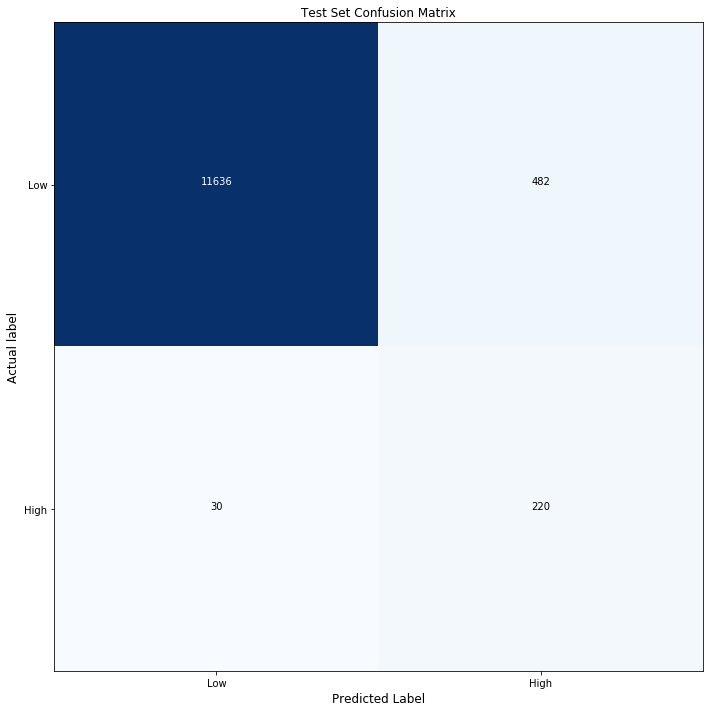

In [145]:
\l ../fdl2019/ml/fresh/notebooks/graphics.q
show cnfM:.ml.confmat[yval;pred1]
conf:.ml.confdict[yval;pred1;1b]

acc:(count where pred1=yval)%count[yval]
meanclassavg:avg (conf[`tp]%(sum conf[`tp`fn]);conf[`tn]%(sum conf[`tn`fp]))

-1"The accuracy of the model is ",string acc;
-1"The mean_class_accuracy of the model is ",string meanclassavg;
.ml.displayCM[value cnfM;`Low`High;"Test Set Confusion Matrix";()]